# Week 5(2) : Naive Bayes and KNN with feature selection 

In [1]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

In [2]:
#loading dataset
wine=load_wine()
data=pd.DataFrame(wine.data, columns=wine.feature_names)
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
# Apply normalization on the 'proline' column
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [4]:
#Adding target column
data['wine'] = wine.target
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,2
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,2
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,2
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,2


In [5]:
# Separate features and target
x = data.drop(columns=['wine'])  # Exclude target column
y = data['wine']
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(133, 13)
(45, 13)
(133,)
(45,)


In [6]:
# Compute mutual information
mutual_info = mutual_info_classif(x_train, y_train)
# Convert to Pandas Series
mutual_info = pd.Series(mutual_info, index=x_train.columns)
# Sort features by importance
mutual_info = mutual_info.sort_values(ascending=False)
print(mutual_info)

flavanoids                      0.721730
hue                             0.587199
proline                         0.560999
color_intensity                 0.543739
od280/od315_of_diluted_wines    0.501384
alcohol                         0.453775
total_phenols                   0.422332
proanthocyanins                 0.312950
malic_acid                      0.276372
alcalinity_of_ash               0.254745
magnesium                       0.200915
nonflavanoid_phenols            0.118385
ash                             0.113385
dtype: float64


In [7]:
top_8_mi = mutual_info.nlargest(8).index
print(top_8_mi)

Index(['flavanoids', 'hue', 'proline', 'color_intensity',
       'od280/od315_of_diluted_wines', 'alcohol', 'total_phenols',
       'proanthocyanins'],
      dtype='object')


Naive Bayes with feature selection

In [8]:
# To get new x_train and x_test for top 8 columns
x_train_mi=x_train[top_8_mi]
x_test_mi=x_test[top_8_mi]

In [9]:
#Naive Bayes
nb_mi = GaussianNB()
nb_mi.fit(x_train_mi, y_train)
y_pred_nb_mi = nb_mi.predict(x_test_mi)
acc_nb_mi = accuracy_score(y_test, y_pred_nb_mi)
print("\nAccuracy Results:")
print(f"Naïve Bayes (Mutual Info): {acc_nb_mi:.4f}")


Accuracy Results:
Naïve Bayes (Mutual Info): 0.9778


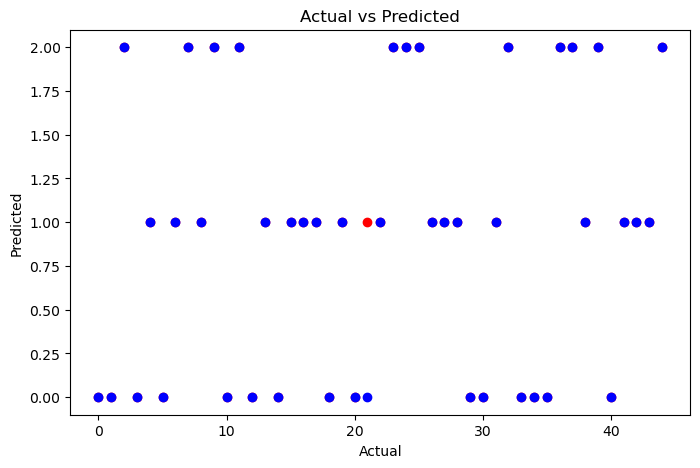

In [10]:
#Actual Vs Predicted
import matplotlib.pyplot as plt
ind = [i for i in range(len(y_test))]
plt.figure(figsize=(8,5))
plt.scatter(ind, y_test,color='red',label='actual values')
plt.scatter(ind, y_pred_nb_mi,color='blue',label='predicted values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

KNN with feature selection

In [11]:
#KNN
knn_mi = KNeighborsClassifier(n_neighbors=25)
knn_mi.fit(x_train_mi, y_train)
y_pred_knn_mi = knn_mi.predict(x_test_mi)
acc_knn_mi = accuracy_score(y_test, y_pred_knn_mi)

print("\nAccuracy Results:")
print(f"KNN (Mutual Info): {acc_knn_mi:.4f}")


Accuracy Results:
KNN (Mutual Info): 0.9556


In [12]:
# To check for best k value
ans=-1
ind=-1
for i in range(2,51):
    knn_mi = KNeighborsClassifier(n_neighbors=i)
    knn_mi.fit(x_train_mi, y_train)
    y_pred_knn_mi = knn_mi.predict(x_test_mi)
    accuracy_knn_mi = accuracy_score(y_test, y_pred_knn_mi)
    if accuracy_knn_mi>ans:
        ans=accuracy_knn_mi
        ind=i
    print(accuracy_knn_mi,i)
print("Best k value:",ind)
print(f'Best Accuracy: {ans:.2f}')

0.9555555555555556 2
0.9333333333333333 3
0.9333333333333333 4
0.9555555555555556 5
0.9333333333333333 6
0.9333333333333333 7
0.9333333333333333 8
0.9111111111111111 9
0.9111111111111111 10
0.9333333333333333 11
0.9333333333333333 12
0.9333333333333333 13
0.9333333333333333 14
0.9333333333333333 15
0.9333333333333333 16
0.9333333333333333 17
0.9333333333333333 18
0.9333333333333333 19
0.9333333333333333 20
0.9333333333333333 21
0.9333333333333333 22
0.9333333333333333 23
0.9333333333333333 24
0.9555555555555556 25
0.9333333333333333 26
0.9555555555555556 27
0.9333333333333333 28
0.9333333333333333 29
0.9333333333333333 30
0.9111111111111111 31
0.9333333333333333 32
0.9333333333333333 33
0.9333333333333333 34
0.9333333333333333 35
0.9333333333333333 36
0.9333333333333333 37
0.9333333333333333 38
0.9333333333333333 39
0.9333333333333333 40
0.9333333333333333 41
0.9333333333333333 42
0.9333333333333333 43
0.9333333333333333 44
0.9333333333333333 45
0.9333333333333333 46
0.9333333333333333

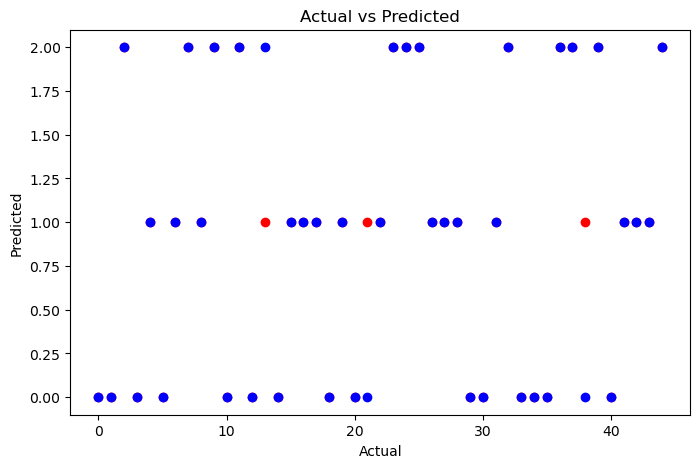

In [14]:
#Actual Vs Predicted
import matplotlib.pyplot as plt
ind = [i for i in range(len(y_test))]
plt.figure(figsize=(8,5))
plt.scatter(ind, y_test,color='red',label='actual values')
plt.scatter(ind, y_pred_knn_mi,color='blue',label='predicted values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

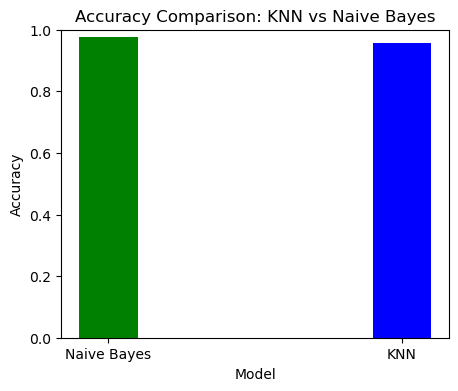

In [26]:
# Plot accuracy comparison
models = ['Naive Bayes', 'KNN']
accuracies = [acc_nb_mi, acc_knn_mi]

plt.figure(figsize=(5, 4))
plt.bar(models, accuracies, color=['green', 'blue'],width=0.2)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: KNN vs Naive Bayes')
plt.ylim(0, 1)
plt.show()

# Feature Selection using chi square 

In [27]:
#univariate analysis
from sklearn.feature_selection import SelectKBest, chi2

In [28]:
# Separate features and target
x1= data.drop(columns=['wine'])
y1= data['wine']

#apply SelectKBest class to extract top10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x1,y1)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x1.columns)

#concat 2 dataframes for better visualisation
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
featureScores= featureScores.sort_values(by='Score', ascending=False)

# Display sorted features
featureScores

,Feature,Score
12,proline,18.792035
11,od280/od315_of_diluted_wines,16.677678
6,flavanoids,16.050977
9,color_intensity,12.453157
0,alcohol,9.454001
5,total_phenols,9.401770
10,hue,8.449402
1,malic_acid,8.118583
7,nonflavanoid_phenols,5.346082
8,proanthocyanins,3.981352


In [29]:
top_8_chi = featureScores.nlargest(8, 'Score')['Feature'].values
print(top_8_chi)

['proline' 'od280/od315_of_diluted_wines' 'flavanoids' 'color_intensity'
 'alcohol' 'total_phenols' 'hue' 'malic_acid']


In [30]:
# Filter datasets based on selected features
x_train_chi, x_test_chi = x_train[top_8_chi], x_test[top_8_chi]

Naive bayes

In [31]:
# Naïve Bayes
nb_chi = GaussianNB()
nb_chi.fit(x_train_chi, y_train)
y_pred_nb_chi = nb_chi.predict(x_test_chi)
acc_nb_chi = accuracy_score(y_test, y_pred_nb_chi)

print("\nAccuracy Results:")
print(f"Naïve Bayes (Chi-Square): {acc_nb_chi:.4f}")


Accuracy Results:
Naïve Bayes (Chi-Square): 0.9778


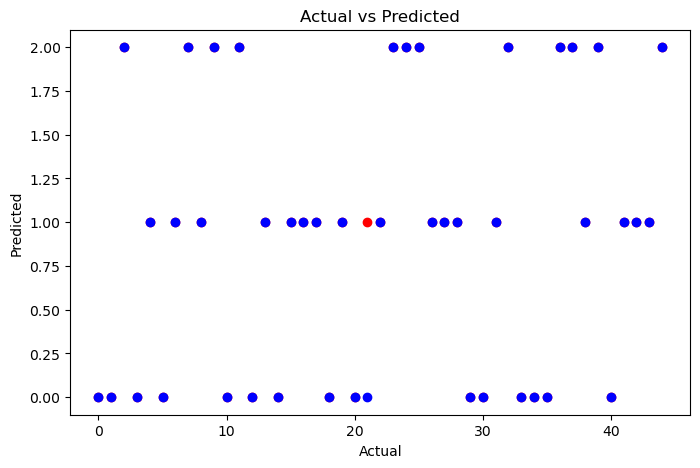

In [33]:
#Actual Vs Predicted
import matplotlib.pyplot as plt
ind = [i for i in range(len(y_test))]
plt.figure(figsize=(8,5))
plt.scatter(ind, y_test,color='red',label='actual values')
plt.scatter(ind, y_pred_nb_chi,color='blue',label='predicted values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

KNN

In [40]:
# To check for best k value
ans=-1
ind=-1
for i in range(2,51):
    knn_chi = KNeighborsClassifier(n_neighbors=i)
    knn_chi.fit(x_train_chi, y_train)
    y_pred_knn_chi = knn_chi.predict(x_test_chi)
    accuracy_knn_chi = accuracy_score(y_test, y_pred_knn_chi)
    if accuracy_knn_chi>ans:
        ans=accuracy_knn_chi
        ind=i
    print(accuracy_knn_chi,i)
print("Best k value:",ind)
print(f'Best Accuracy: {ans:.2f}')

0.9555555555555556 2
0.9777777777777777 3
0.9333333333333333 4
0.9555555555555556 5
0.9333333333333333 6
0.9555555555555556 7
0.9333333333333333 8
0.9555555555555556 9
0.9333333333333333 10
0.9555555555555556 11
0.9555555555555556 12
0.9555555555555556 13
0.9555555555555556 14
0.9555555555555556 15
0.9555555555555556 16
0.9555555555555556 17
0.9333333333333333 18
0.9555555555555556 19
0.9555555555555556 20
0.9555555555555556 21
0.9333333333333333 22
0.9333333333333333 23
0.9333333333333333 24
0.9333333333333333 25
0.9333333333333333 26
0.9333333333333333 27
0.9333333333333333 28
0.9333333333333333 29
0.9333333333333333 30
0.9333333333333333 31
0.9333333333333333 32
0.9333333333333333 33
0.9333333333333333 34
0.9333333333333333 35
0.9333333333333333 36
0.9333333333333333 37
0.9333333333333333 38
0.9333333333333333 39
0.9333333333333333 40
0.9333333333333333 41
0.9333333333333333 42
0.9333333333333333 43
0.9333333333333333 44
0.9333333333333333 45
0.9333333333333333 46
0.9333333333333333

In [41]:
# KNN
knn_chi = KNeighborsClassifier(n_neighbors=25)
knn_chi.fit(x_train_chi, y_train)
y_pred_knn_chi = knn_chi.predict(x_test_chi)
acc_knn_chi = accuracy_score(y_test, y_pred_knn_chi)
print("\nAccuracy Results:")
print(f"KNN (Chi-Square): {acc_knn_chi:.4f}")


Accuracy Results:
KNN (Chi-Square): 0.9333


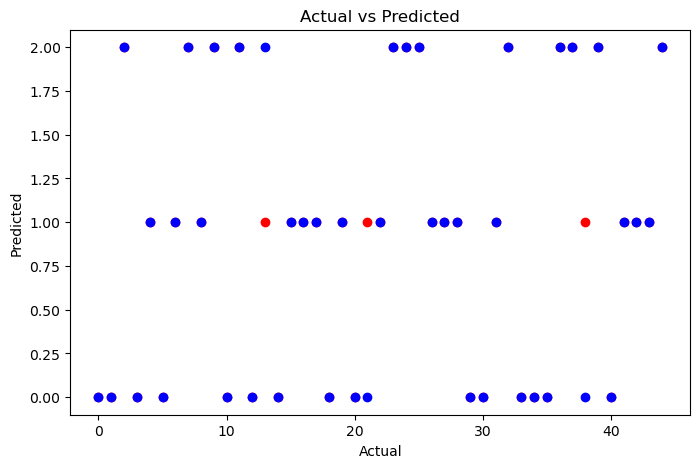

In [42]:
#Actual Vs Predicted
import matplotlib.pyplot as plt
ind = [i for i in range(len(y_test))]
plt.figure(figsize=(8,5))
plt.scatter(ind, y_test,color='red',label='actual values')
plt.scatter(ind, y_pred_knn_chi,color='blue',label='predicted values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

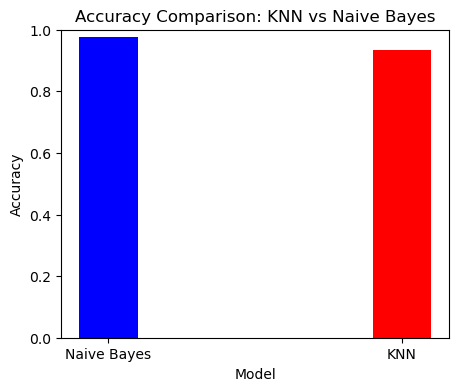

In [43]:
# Plot accuracy comparison
models = ['Naive Bayes', 'KNN']
accuracies = [acc_nb_chi, acc_knn_chi]

plt.figure(figsize=(5, 4))
plt.bar(models, accuracies, color=['blue', 'red'],width=0.2)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: KNN vs Naive Bayes')
plt.ylim(0, 1)
plt.show()